# Logistic Regression from Scratch with Pytorch 

 In this notebook, I'm implementing **Logistic Regression** in a vectorized way, using **PyTorch**!

## **1-** Importing necessary libraries:

In [21]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mplcyberpunk                # An optional library for modernizing matplotlib
                                   # install : pip install mplcyberpunk

## **2-** Loading the dataframe, and separating the data:

In [22]:
df = pd.read_csv('Logistic_Regression_dataframe.csv')
x = df.x.values
y = df.y.values
x = x.astype('float32')
y = y.astype('float32')

## **3-** Normalizing and visualizing:

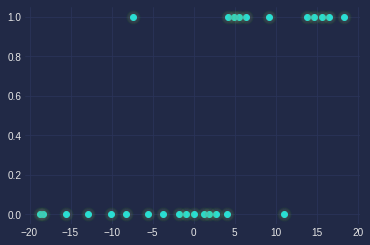

In [23]:
x = x/x.mean()    #normalizing so the exp function won't explode or return zero

plt.style.use('cyberpunk')
plt.scatter(x,y)
mplcyberpunk.make_scatter_glow()
plt.show()

## **4-** Creating the model inheriting from PyTorch module:

In [24]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.Weights = nn.Parameter(torch.randn(1,
                                                 requires_grad=True,
                                                 dtype=torch.float))
        self.Bias = nn.Parameter(torch.randn(1,
                                              requires_grad=True,
                                              dtype=torch.float))
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return 1 / (1 + torch.exp( -1 * (self.Weights * x + self.Bias)))  #sigmoid

## **5-** Instantiating and testing and visualizing the **non-trained(raw)** model:

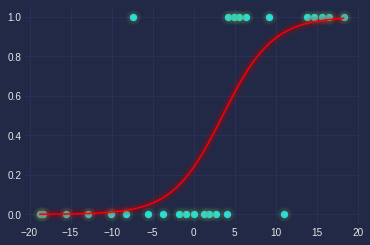

In [25]:
model = LogisticRegression()
x_test = np.arange(x.min(),x.max(),0.25)    # creating a long vector for plotting a smooth curve
y_pred = torch.Tensor(model(torch.from_numpy(x_test))).detach().numpy()
#in order to transform a tensor into a numpy array it must have requires_grad=False

plt.scatter(x,y,s=40)
plt.plot(x_test,y_pred,color='r')
mplcyberpunk.make_lines_glow()
mplcyberpunk.make_scatter_glow()
plt.show()

## **6-** Choosing a loss function and an optimizer:

In [26]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(params=model.parameters(),
                            lr=0.01)

## **7-** Building a training loop:

In [27]:
epochs = 501
for epoch in range(epochs):
    y_pred = model(torch.from_numpy(x))
    loss = criterion(y_pred,torch.from_numpy(y))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch%100 == 0:
        print(f'epoch #{epoch} | loss: {loss}')

epoch #0 | loss: 0.41523951292037964
epoch #100 | loss: 0.39678502082824707
epoch #200 | loss: 0.3967849016189575
epoch #300 | loss: 0.3967849314212799
epoch #400 | loss: 0.3967849016189575
epoch #500 | loss: 0.3967849016189575


## **8-** Testing and visualizing the trained model:

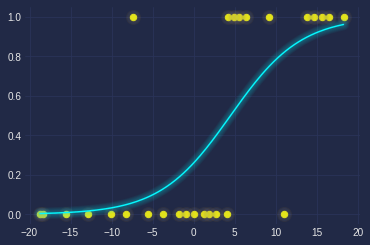

In [28]:
x_test = np.arange(x.min(),x.max(),0.25)
y_pred = torch.Tensor(model(torch.from_numpy(x_test))).detach().numpy()
plt.scatter(x,y,color='yellow',s=40)
plt.plot(x_test,y_pred)
mplcyberpunk.make_lines_glow()
mplcyberpunk.make_scatter_glow()
plt.show()